In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# Data intro

In [3]:
path = 'dataset_geologist.xlsx'
data = pd.read_excel(path, index_col='Unnamed: 0')

In [4]:
new_col_names = ['_'.join(s.split()[1:]) for s in data.columns]
new_col_names[0] = 'num'

In [5]:
data.columns = new_col_names

In [6]:
data.head()

,num,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Latitude,Longitude,Operator_company,...,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,6,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION,26.0800,49.8100,SAUDI ARAMCO,...,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
1,10,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,...,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
2,11,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH,9843,NEOGENE,THINLY-BEDDED SANDSTONE,115.0,66.0,22.0,200.0
3,12,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
4,20,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION,21.9607,56.0452,PDO,...,OIL,REJUVENATING,SALT,4955,CRETACEOUS,LIMESTONE,250.0,100.0,21.0,60.0


In [7]:
data.shape

(514, 21)

In [8]:
data.dtypes

num                                 int64
Field_name                         object
Reservoir_unit                     object
Country                            object
Region                             object
Basin_name                         object
Tectonic_regime                    object
Latitude                          float64
Longitude                         float64
Operator_company                   object
Onshore_or_offshore                object
Hydrocarbon_type_(main)            object
Reservoir_status_(current)         object
Structural_setting                 object
Depth_(top_reservoir_ft_TVD)        int64
Reservoir_period                   object
Lithology_(main)                   object
Thickness_(gross_average_ft)      float64
Thickness_(net_pay_average_ft)    float64
Porosity_(matrix_average_%)       float64
Permeability_(air_average_mD)     float64
dtype: object

In [9]:
data.isna().sum()

num                                0
Field_name                         0
Reservoir_unit                     0
Country                            0
Region                             0
Basin_name                         0
Tectonic_regime                   72
Latitude                           0
Longitude                          0
Operator_company                   0
Onshore_or_offshore                0
Hydrocarbon_type_(main)            0
Reservoir_status_(current)         0
Structural_setting                 0
Depth_(top_reservoir_ft_TVD)       0
Reservoir_period                   0
Lithology_(main)                   0
Thickness_(gross_average_ft)       0
Thickness_(net_pay_average_ft)     0
Porosity_(matrix_average_%)       72
Permeability_(air_average_mD)      0
dtype: int64

In [10]:
df = data.copy()

In [11]:
df.drop('num', inplace=True, axis=1)
df.dropna(inplace=True)

In [12]:
need_cols = ['Tectonic_regime', 'Region', 'Hydrocarbon_type_(main)', 'Structural_setting', 'Depth_(top_reservoir_ft_TVD)', 'Reservoir_period', 'Lithology_(main)',
       'Thickness_(gross_average_ft)', 'Thickness_(net_pay_average_ft)', 'Porosity_(matrix_average_%)', 'Permeability_(air_average_mD)']

In [13]:
', '.join([i.replace('_', ' ') for i in need_cols])

'Tectonic regime, Region, Hydrocarbon type (main), Structural setting, Depth (top reservoir ft TVD), Reservoir period, Lithology (main), Thickness (gross average ft), Thickness (net pay average ft), Porosity (matrix average %), Permeability (air average mD)'

In [14]:
df = df[need_cols]

## Numerical columns

In [15]:
num_cols = data.select_dtypes(exclude='object')
num_cols.shape

(514, 8)

In [16]:
num_cols.describe()

,num,Latitude,Longitude,Depth_(top_reservoir_ft_TVD),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,442.000000,514.000000
mean,537.642023,35.095555,-8.997048,6707.280156,783.678988,190.771751,17.929955,464.760239
std,314.239936,22.121078,88.163502,3613.719746,1424.953719,271.926665,7.554253,1001.308403
min,6.000000,-38.522100,-151.615300,220.000000,11.000000,0.000000,1.100000,0.001000
25%,263.250000,28.124825,-102.403650,3909.750000,140.000000,43.250000,12.000000,10.000000
50%,529.000000,37.810400,2.212100,6393.500000,328.000000,101.000000,17.900000,83.000000
75%,812.750000,51.285650,57.318375,9116.250000,753.750000,225.000000,24.000000,400.000000
max,1071.000000,76.446200,150.210000,19888.000000,12500.000000,2976.000000,55.000000,7500.000000


## Categorical columns

In [17]:
cat_cols = df.select_dtypes(include='object')
cat_cols.head()

,Tectonic_regime,Region,Hydrocarbon_type_(main),Structural_setting,Reservoir_period,Lithology_(main)
0,COMPRESSION,MIDDLE EAST,OIL,FORELAND,JURASSIC,LIMESTONE
1,EXTENSION,AFRICA,GAS-CONDENSATE,RIFT,CRETACEOUS,SANDSTONE
2,STRIKE-SLIP,AFRICA,GAS,WRENCH,NEOGENE,THINLY-BEDDED SANDSTONE
3,STRIKE-SLIP,AFRICA,GAS,WRENCH,NEOGENE,SANDSTONE
4,COMPRESSION,MIDDLE EAST,OIL,SALT,CRETACEOUS,LIMESTONE


In [18]:
cat_cols.shape

(442, 6)

In [19]:
cat_cols.describe()

,Tectonic_regime,Region,Hydrocarbon_type_(main),Structural_setting,Reservoir_period,Lithology_(main)
count,442,442,442,442,442,442
unique,9,7,6,12,15,17
top,COMPRESSION,NORTH AMERICA,OIL,FORELAND,CRETACEOUS,SANDSTONE
freq,214,171,332,122,122,248


### Try label encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [22]:
df[cat_cols.columns].head()

,Tectonic_regime,Region,Hydrocarbon_type_(main),Structural_setting,Reservoir_period,Lithology_(main)
0,COMPRESSION,MIDDLE EAST,OIL,FORELAND,JURASSIC,LIMESTONE
1,EXTENSION,AFRICA,GAS-CONDENSATE,RIFT,CRETACEOUS,SANDSTONE
2,STRIKE-SLIP,AFRICA,GAS,WRENCH,NEOGENE,THINLY-BEDDED SANDSTONE
3,STRIKE-SLIP,AFRICA,GAS,WRENCH,NEOGENE,SANDSTONE
4,COMPRESSION,MIDDLE EAST,OIL,SALT,CRETACEOUS,LIMESTONE


In [23]:
fitted_le = df[cat_cols.columns].apply(lambda x: d[x.name].fit_transform(x))
df[cat_cols.columns] = fitted_le

In [24]:
df.head()

,Tectonic_regime,Region,Hydrocarbon_type_(main),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,0,5,5,2,6050,5,9,250.0,184.0,21.0,410.0
1,2,0,3,6,10282,3,11,745.0,144.0,10.0,8.0
2,5,0,2,11,9843,7,15,115.0,66.0,22.0,200.0
3,5,0,2,11,10499,7,11,509.0,410.0,20.0,300.0
4,0,5,5,7,4955,3,9,250.0,100.0,21.0,60.0


### Load and analyze synthetic data via svm

In [25]:
path_bdeu = 'bdeu_samples_2.csv'
path_k2 = 'k2_samples_2.csv'
k2_df = pd.read_csv(path_k2, index_col='Unnamed: 0')
bdeu_df = pd.read_csv(path_bdeu, index_col='Unnamed: 0')
bdeu_df = bdeu_df[df.columns].dropna()
k2_df = k2_df[df.columns].dropna()
print(bdeu_df.shape)
print(k2_df.shape)

(10000, 11)
(10000, 11)


### Scaling

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [27]:
def create_scaled_df(source, stype='standard'):
    df_all = source.copy()
    #df_all = df_all.append(samples)
    if stype == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df_all[df.columns] = scaler.fit_transform(df_all)
    return df_all, scaler,

In [28]:
k2_df.head()

,Tectonic_regime,Region,Hydrocarbon_type_(main),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,COMPRESSION,FORMER SOVIET UNION,METHANE HYDRATE,INTRACRATONIC,1320.5,NEOGENE,DOLOMITE,7000.0,337.5,17.50,75.0
1,GRAVITY,MIDDLE EAST,GAS,SALT,4090.0,CRETACEOUS,THINLY-BEDDED SANDSTONE,1152.0,140.0,26.25,35.0
2,EXTENSION,AFRICA,OIL,RIFT,15389.0,NEOGENE,LOW-RESISTIVITY SANDSTONE,101.0,11.5,12.65,14.0
3,GRAVITY,EUROPE,OIL,SALT,6288.5,CRETACEOUS,SANDSTONE,475.0,101.5,15.00,161.0
4,GRAVITY,FAR EAST,GAS,DELTA,1320.5,JURASSIC,SANDSTONE,101.0,71.5,26.25,850.0


In [29]:
k2_df[cat_cols.columns] = k2_df[cat_cols.columns].apply(lambda x: d[x.name].transform(x))
bdeu_df[cat_cols.columns] = bdeu_df[cat_cols.columns].apply(lambda x: d[x.name].transform(x))

bdeu_df.head()

,Tectonic_regime,Region,Hydrocarbon_type_(main),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,5,2,2,0,8763.5,7,11,160.0,71.5,17.5,4350.0
1,4,2,5,4,5153.5,7,11,1152.0,205.0,17.5,850.0
2,2,1,5,6,7513.5,11,11,46.5,11.5,41.5,4350.0
3,5,2,5,11,15389.0,7,11,475.0,101.5,41.5,4350.0
4,0,6,5,2,2960.5,3,11,7000.0,71.5,17.5,161.0


In [30]:
k2_df.head()

,Tectonic_regime,Region,Hydrocarbon_type_(main),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,0,3,4,3,1320.5,7,6,7000.0,337.5,17.50,75.0
1,3,5,2,7,4090.0,3,15,1152.0,140.0,26.25,35.0
2,2,0,5,6,15389.0,7,10,101.0,11.5,12.65,14.0
3,3,1,5,7,6288.5,3,11,475.0,101.5,15.00,161.0
4,3,2,2,1,1320.5,5,11,101.0,71.5,26.25,850.0


In [31]:
df_standard, scaler = create_scaled_df(df)
bdeu_df[df.columns] = scaler.transform(bdeu_df)
bdeu_df.head()

,Tectonic_regime,Region,Hydrocarbon_type_(main),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,1.884408,-0.784948,-1.961226,-1.669332,0.602462,0.354901,0.51916,-0.433328,-0.417120,-0.056980,3.819243
1,1.322770,-0.784948,0.558721,-0.284358,-0.409188,0.354901,0.51916,0.254956,0.056550,-0.056980,0.374124
2,0.199496,-1.246928,0.558721,0.408129,0.252168,1.545539,0.51916,-0.512078,-0.630005,3.123638,3.819243
3,1.884408,-0.784948,0.558721,2.139346,2.459164,0.354901,0.51916,-0.214770,-0.310678,3.123638,3.819243
4,-0.923779,1.062972,0.558721,-0.976845,-1.023745,-0.835736,0.51916,4.312498,-0.417120,-0.056980,-0.304073


In [32]:
k2_df[df.columns] = scaler.transform(k2_df)

### One-class SVM

In [33]:
from sklearn import svm

In [34]:
gamma = (1./df.shape[0])

In [35]:
def find_nu(data):
    res = []
    vals = np.linspace(0.001, 1, 1000)
    for v in vals:
        svm_ = svm.OneClassSVM(gamma=gamma, nu=v) 
        svm_.fit(data)
        labels = svm_.predict(data)
        res.append([v, (labels==1).mean()])
    return res

In [36]:
#standard
res = find_nu(df_standard)
nu_standard = max(res, key=lambda x: x[1])[0]
nu_standard

0.004

In [37]:
svm_ = svm.OneClassSVM(gamma=gamma, nu=nu_standard) 
svm_.fit(df_standard)
labels = svm_.predict(df_standard)
(labels==1).mean()

0.9932126696832579

In [38]:
data_to_show_standard = df_standard[need_cols]
data_to_show_standard['label'] = labels

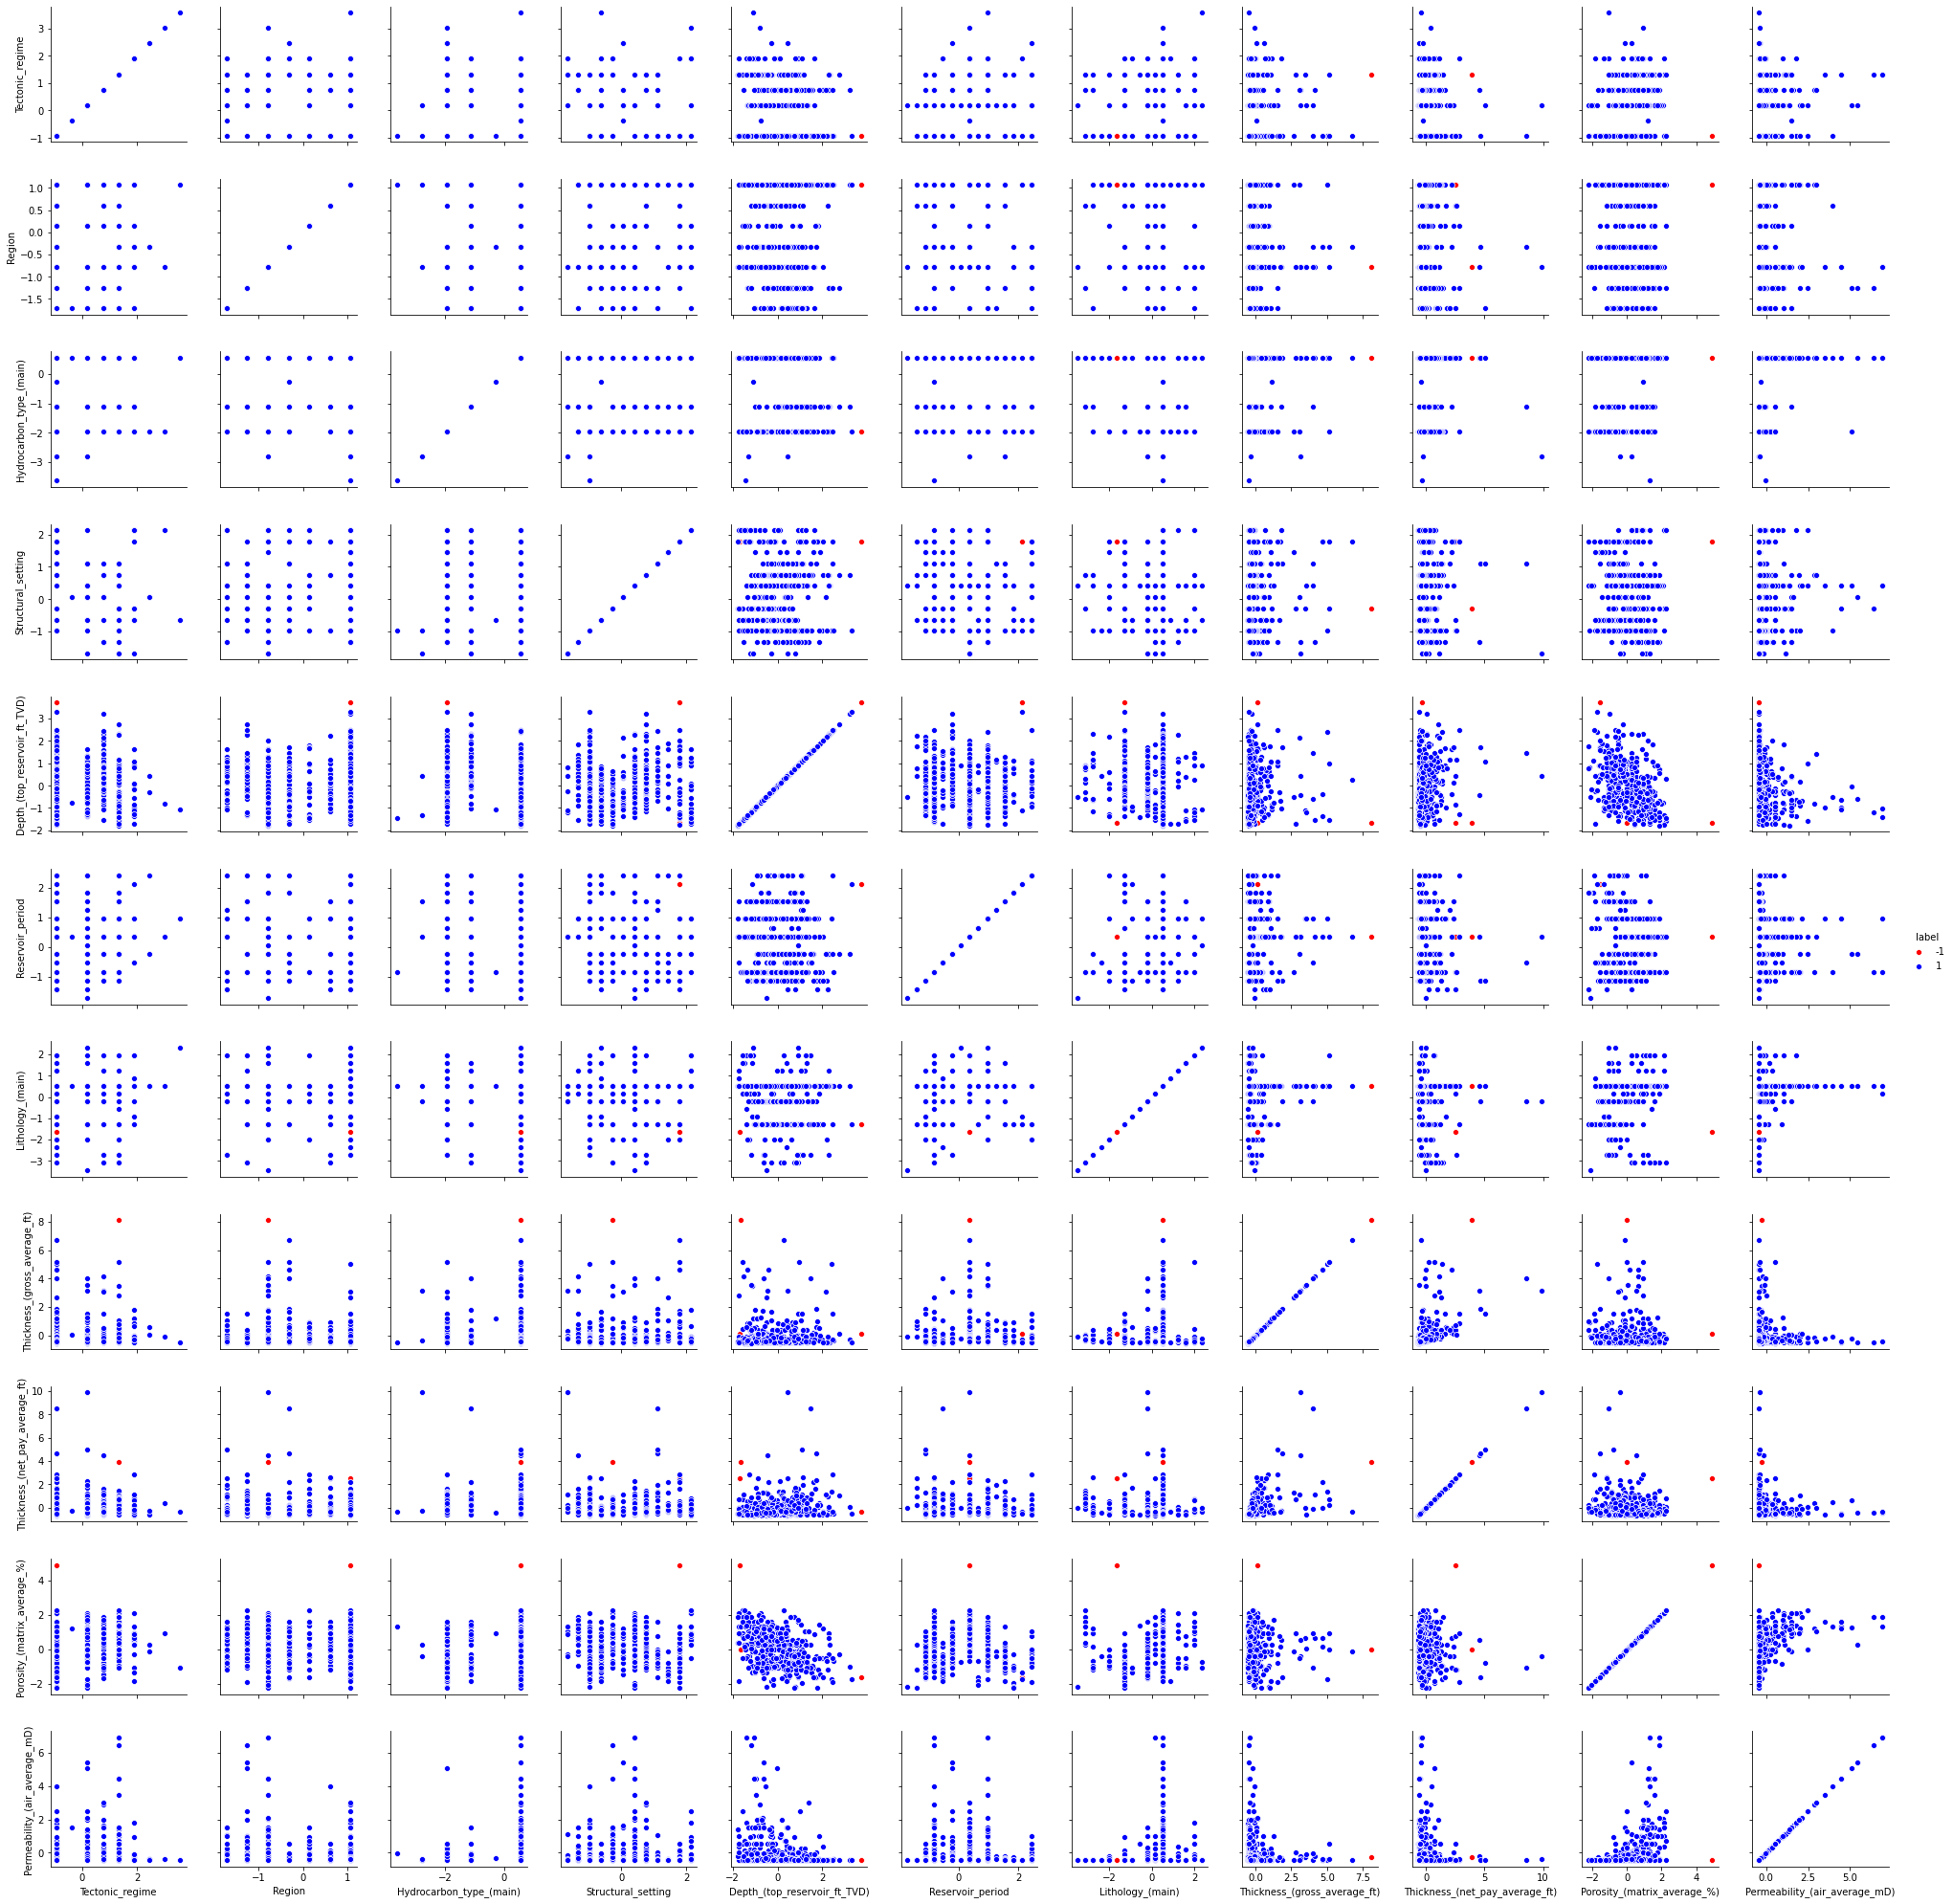

In [39]:
#minmax
sns.pairplot(data_to_show_standard, vars = df[need_cols], hue = 'label', palette={1: 'b', -1: 'r'}, diag_kind=None)

In [40]:
bdeu_labels = svm_.predict(bdeu_df)
bdeu_df['label'] = bdeu_labels
(bdeu_labels==1).mean()

0.9979

In [41]:
bdeu_data_to_show = data_to_show_standard.append(bdeu_df)

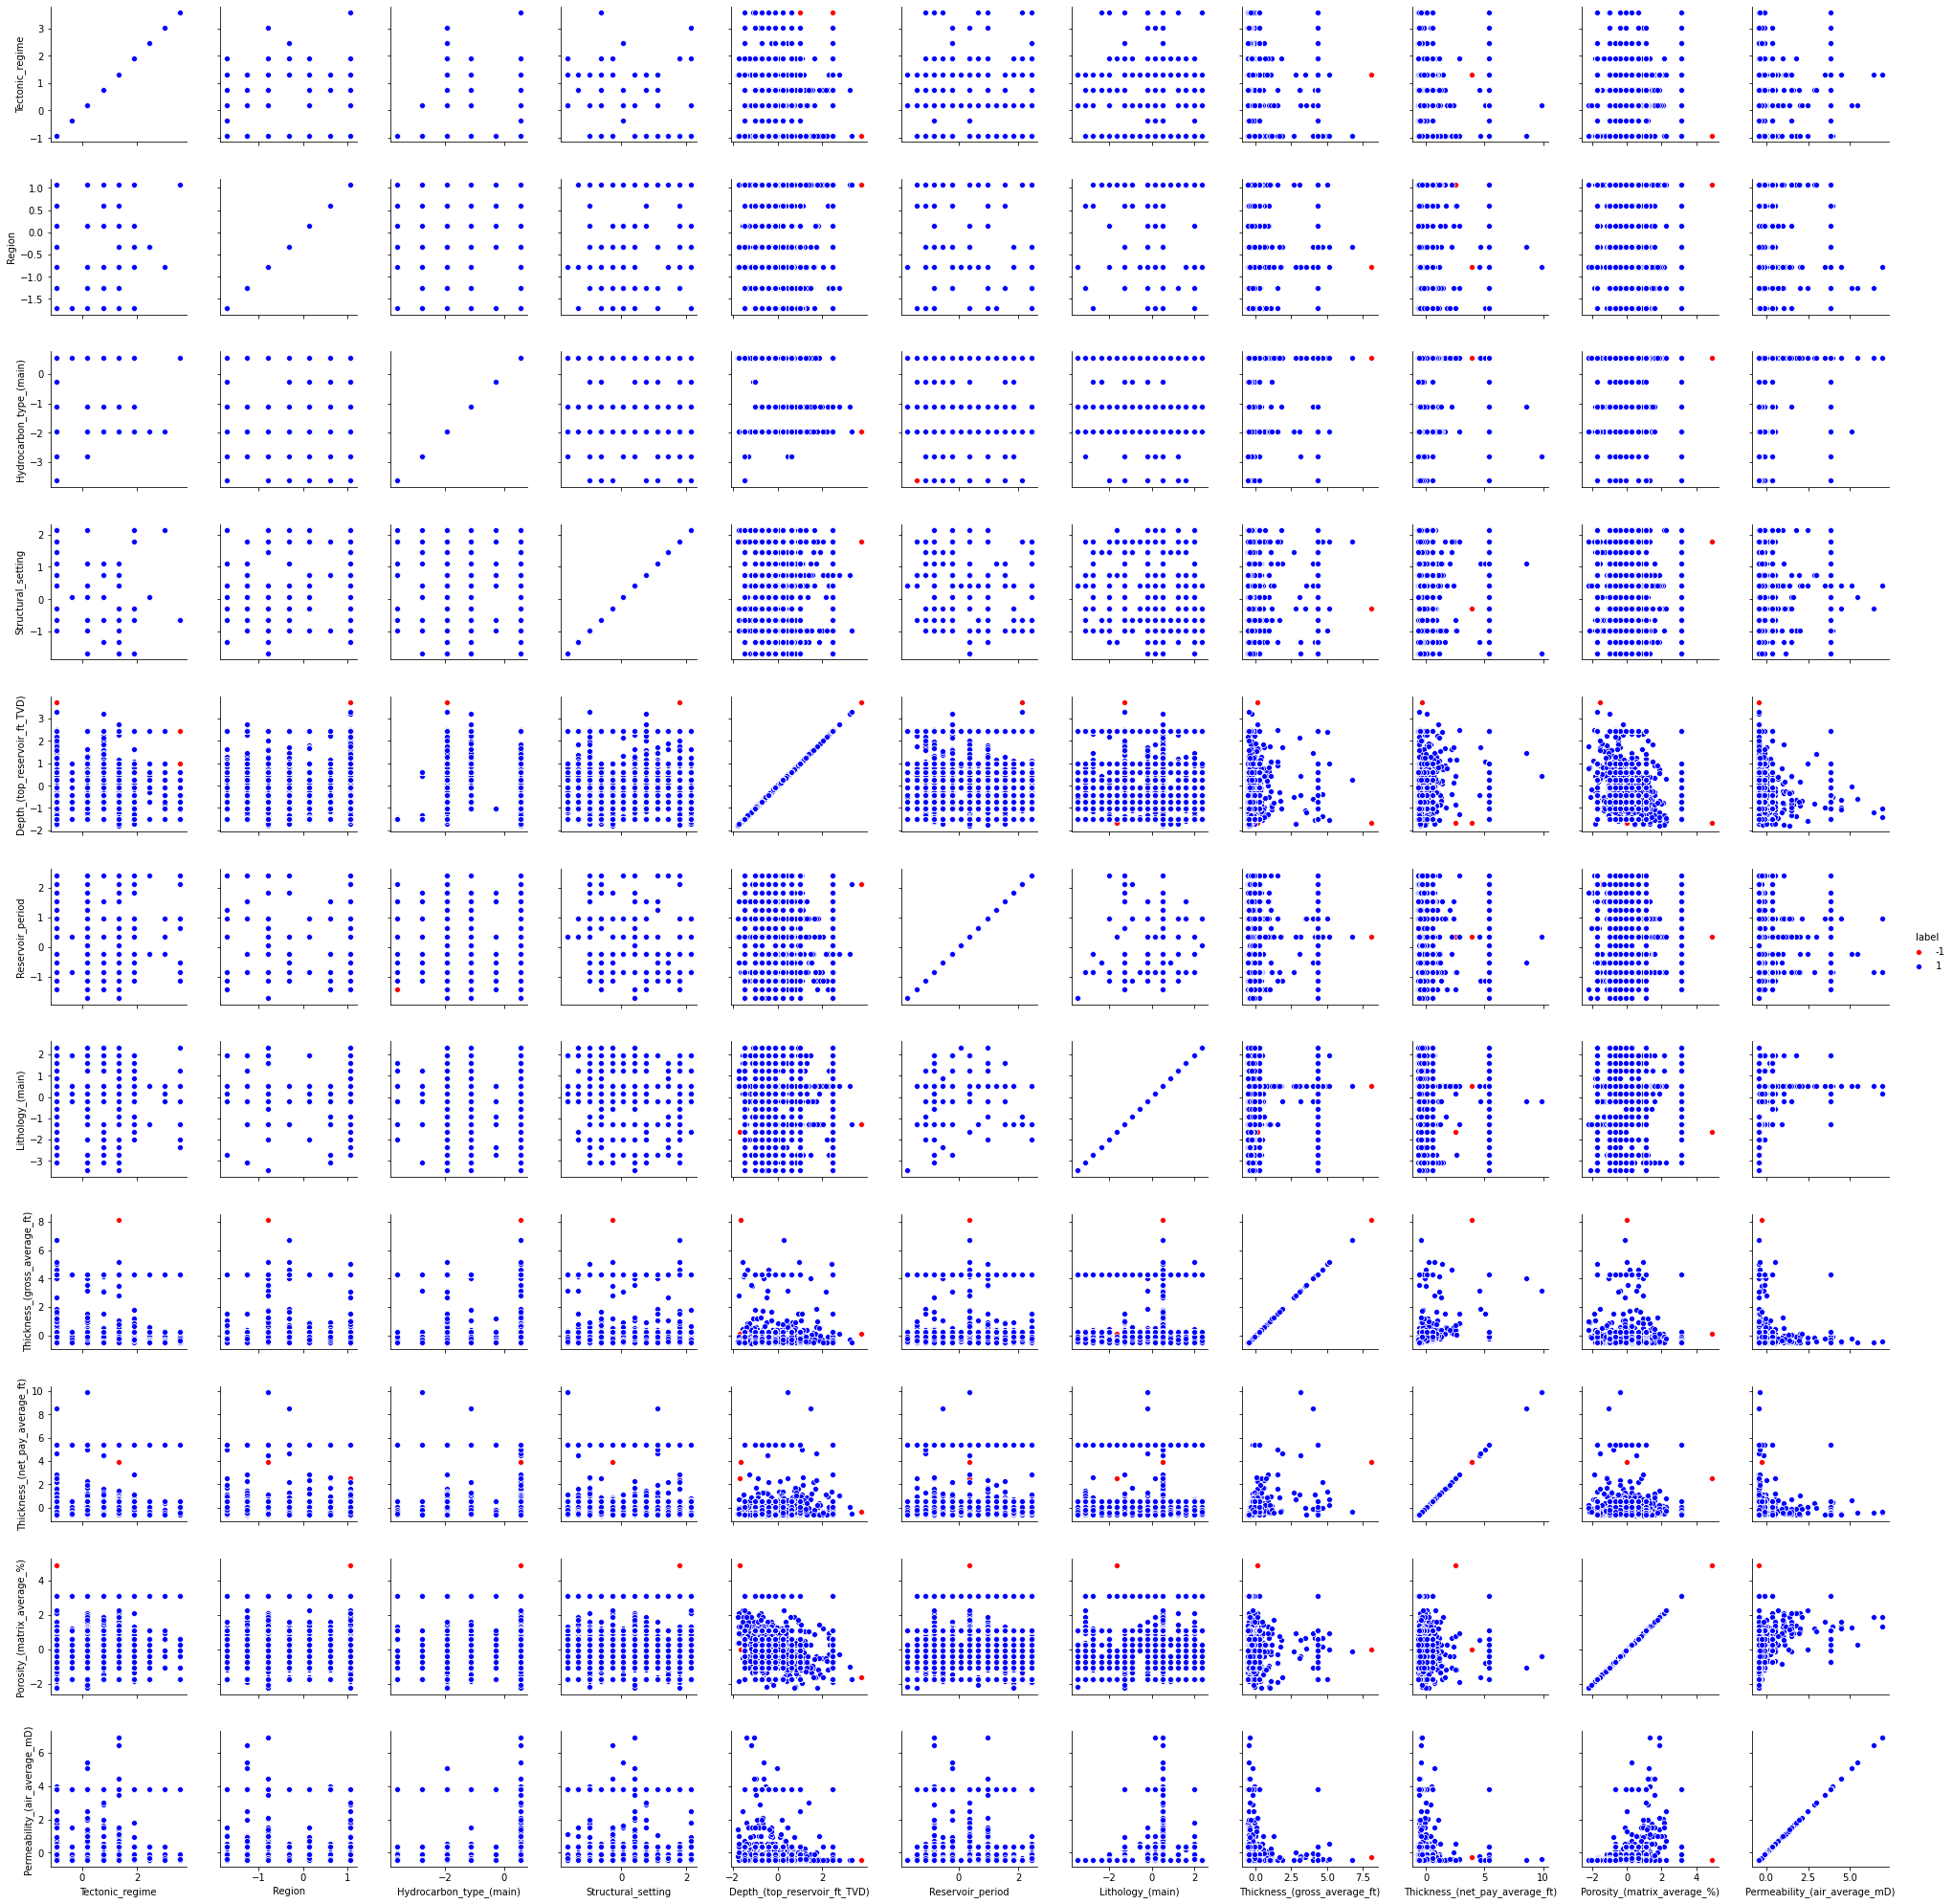

In [42]:
sns.pairplot(bdeu_data_to_show, vars = bdeu_data_to_show[need_cols], hue = 'label', palette={1: 'b', -1: 'r'}, diag_kind=None)

In [43]:
k2_labels = svm_.predict(k2_df)
k2_df['label'] = k2_labels
(k2_labels==1).mean()

0.996

### Check svm with invalid samples

### Remember boxplots

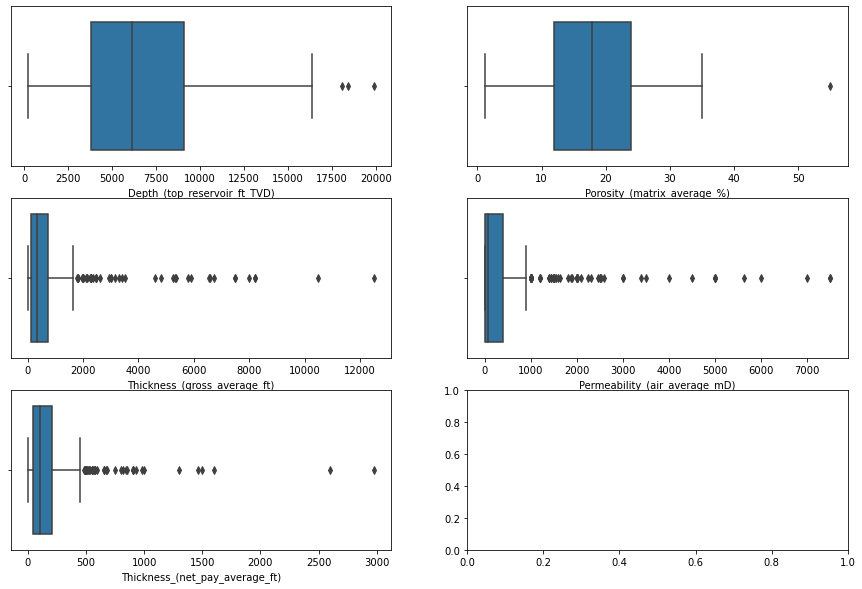

In [44]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
count = 0
for idx, feature in enumerate(num_cols.columns[3:]):
    sns.boxplot(x=df[feature], ax=axes[count % 3, count // 3])
    count += 1

In [45]:
import random

In [46]:
ind = random.randint(0, len(df) - 15)
rand_samples = df[ind:ind + 10]

In [47]:
data.describe()

,num,Latitude,Longitude,Depth_(top_reservoir_ft_TVD),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,442.000000,514.000000
mean,537.642023,35.095555,-8.997048,6707.280156,783.678988,190.771751,17.929955,464.760239
std,314.239936,22.121078,88.163502,3613.719746,1424.953719,271.926665,7.554253,1001.308403
min,6.000000,-38.522100,-151.615300,220.000000,11.000000,0.000000,1.100000,0.001000
25%,263.250000,28.124825,-102.403650,3909.750000,140.000000,43.250000,12.000000,10.000000
50%,529.000000,37.810400,2.212100,6393.500000,328.000000,101.000000,17.900000,83.000000
75%,812.750000,51.285650,57.318375,9116.250000,753.750000,225.000000,24.000000,400.000000
max,1071.000000,76.446200,150.210000,19888.000000,12500.000000,2976.000000,55.000000,7500.000000


In [48]:
rand_samples['Depth_(top_reservoir_ft_TVD)'] = [i for i in range(-10, 0)]
rand_samples['Thickness_(gross_average_ft)'] = [i for i in range(1000, 2000, 100)]
rand_samples['Porosity_(matrix_average_%)'] = [i for i in range(50, 150, 10)]

In [49]:
rand_samples[rand_samples.columns] = scaler.transform(rand_samples)

In [50]:
new_labels = svm_.predict(rand_samples)
rand_samples['label'] = new_labels - 1
(new_labels==1).mean()

0.1

In [51]:
rand_samples

,Tectonic_regime,Region,Hydrocarbon_type_(main),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD),label
430,0.761133,-1.246928,-1.121244,0.754372,-1.856185,-0.835736,-3.094518,0.149493,1.280640,4.250107,-0.461761,0
431,0.761133,-1.246928,0.558721,0.754372,-1.855905,-0.835736,-3.094518,0.218876,1.067755,5.575365,-0.461957,-2
432,1.322770,-0.784948,-1.961226,0.408129,-1.855625,-0.835736,-0.564944,0.288260,-0.560818,6.900623,0.521772,-2
433,-0.923779,1.062972,0.558721,1.446859,-1.855345,-1.133395,-1.287679,0.357643,0.379426,8.225880,-0.455658,-2
435,1.322770,-0.322968,-1.961226,-0.284358,-1.855065,-0.240417,-1.287679,0.427027,-0.461471,9.551138,-0.402504,-2
436,1.322770,-0.322968,-1.961226,-0.284358,-1.854784,-0.240417,-1.287679,0.496410,-0.599847,10.876395,-0.455362,-2
437,1.322770,-1.246928,0.558721,0.754372,-1.854504,-0.240417,0.519160,0.565794,0.666821,12.201653,-0.167252,-2
438,-0.923779,1.062972,0.558721,-0.976845,-1.854224,1.545539,-1.287679,0.635177,-0.564366,13.526911,-0.441877,-2
439,-0.923779,-0.322968,-1.961226,-0.630602,-1.853944,-0.835736,0.519160,0.704560,0.890350,14.852168,-0.137722,-2
442,1.322770,-0.322968,0.558721,-0.284358,-1.853663,-0.240417,0.519160,0.773944,0.876158,16.177426,-0.231233,-2


In [52]:
rand_data_to_show = data_to_show_standard.append(rand_samples)

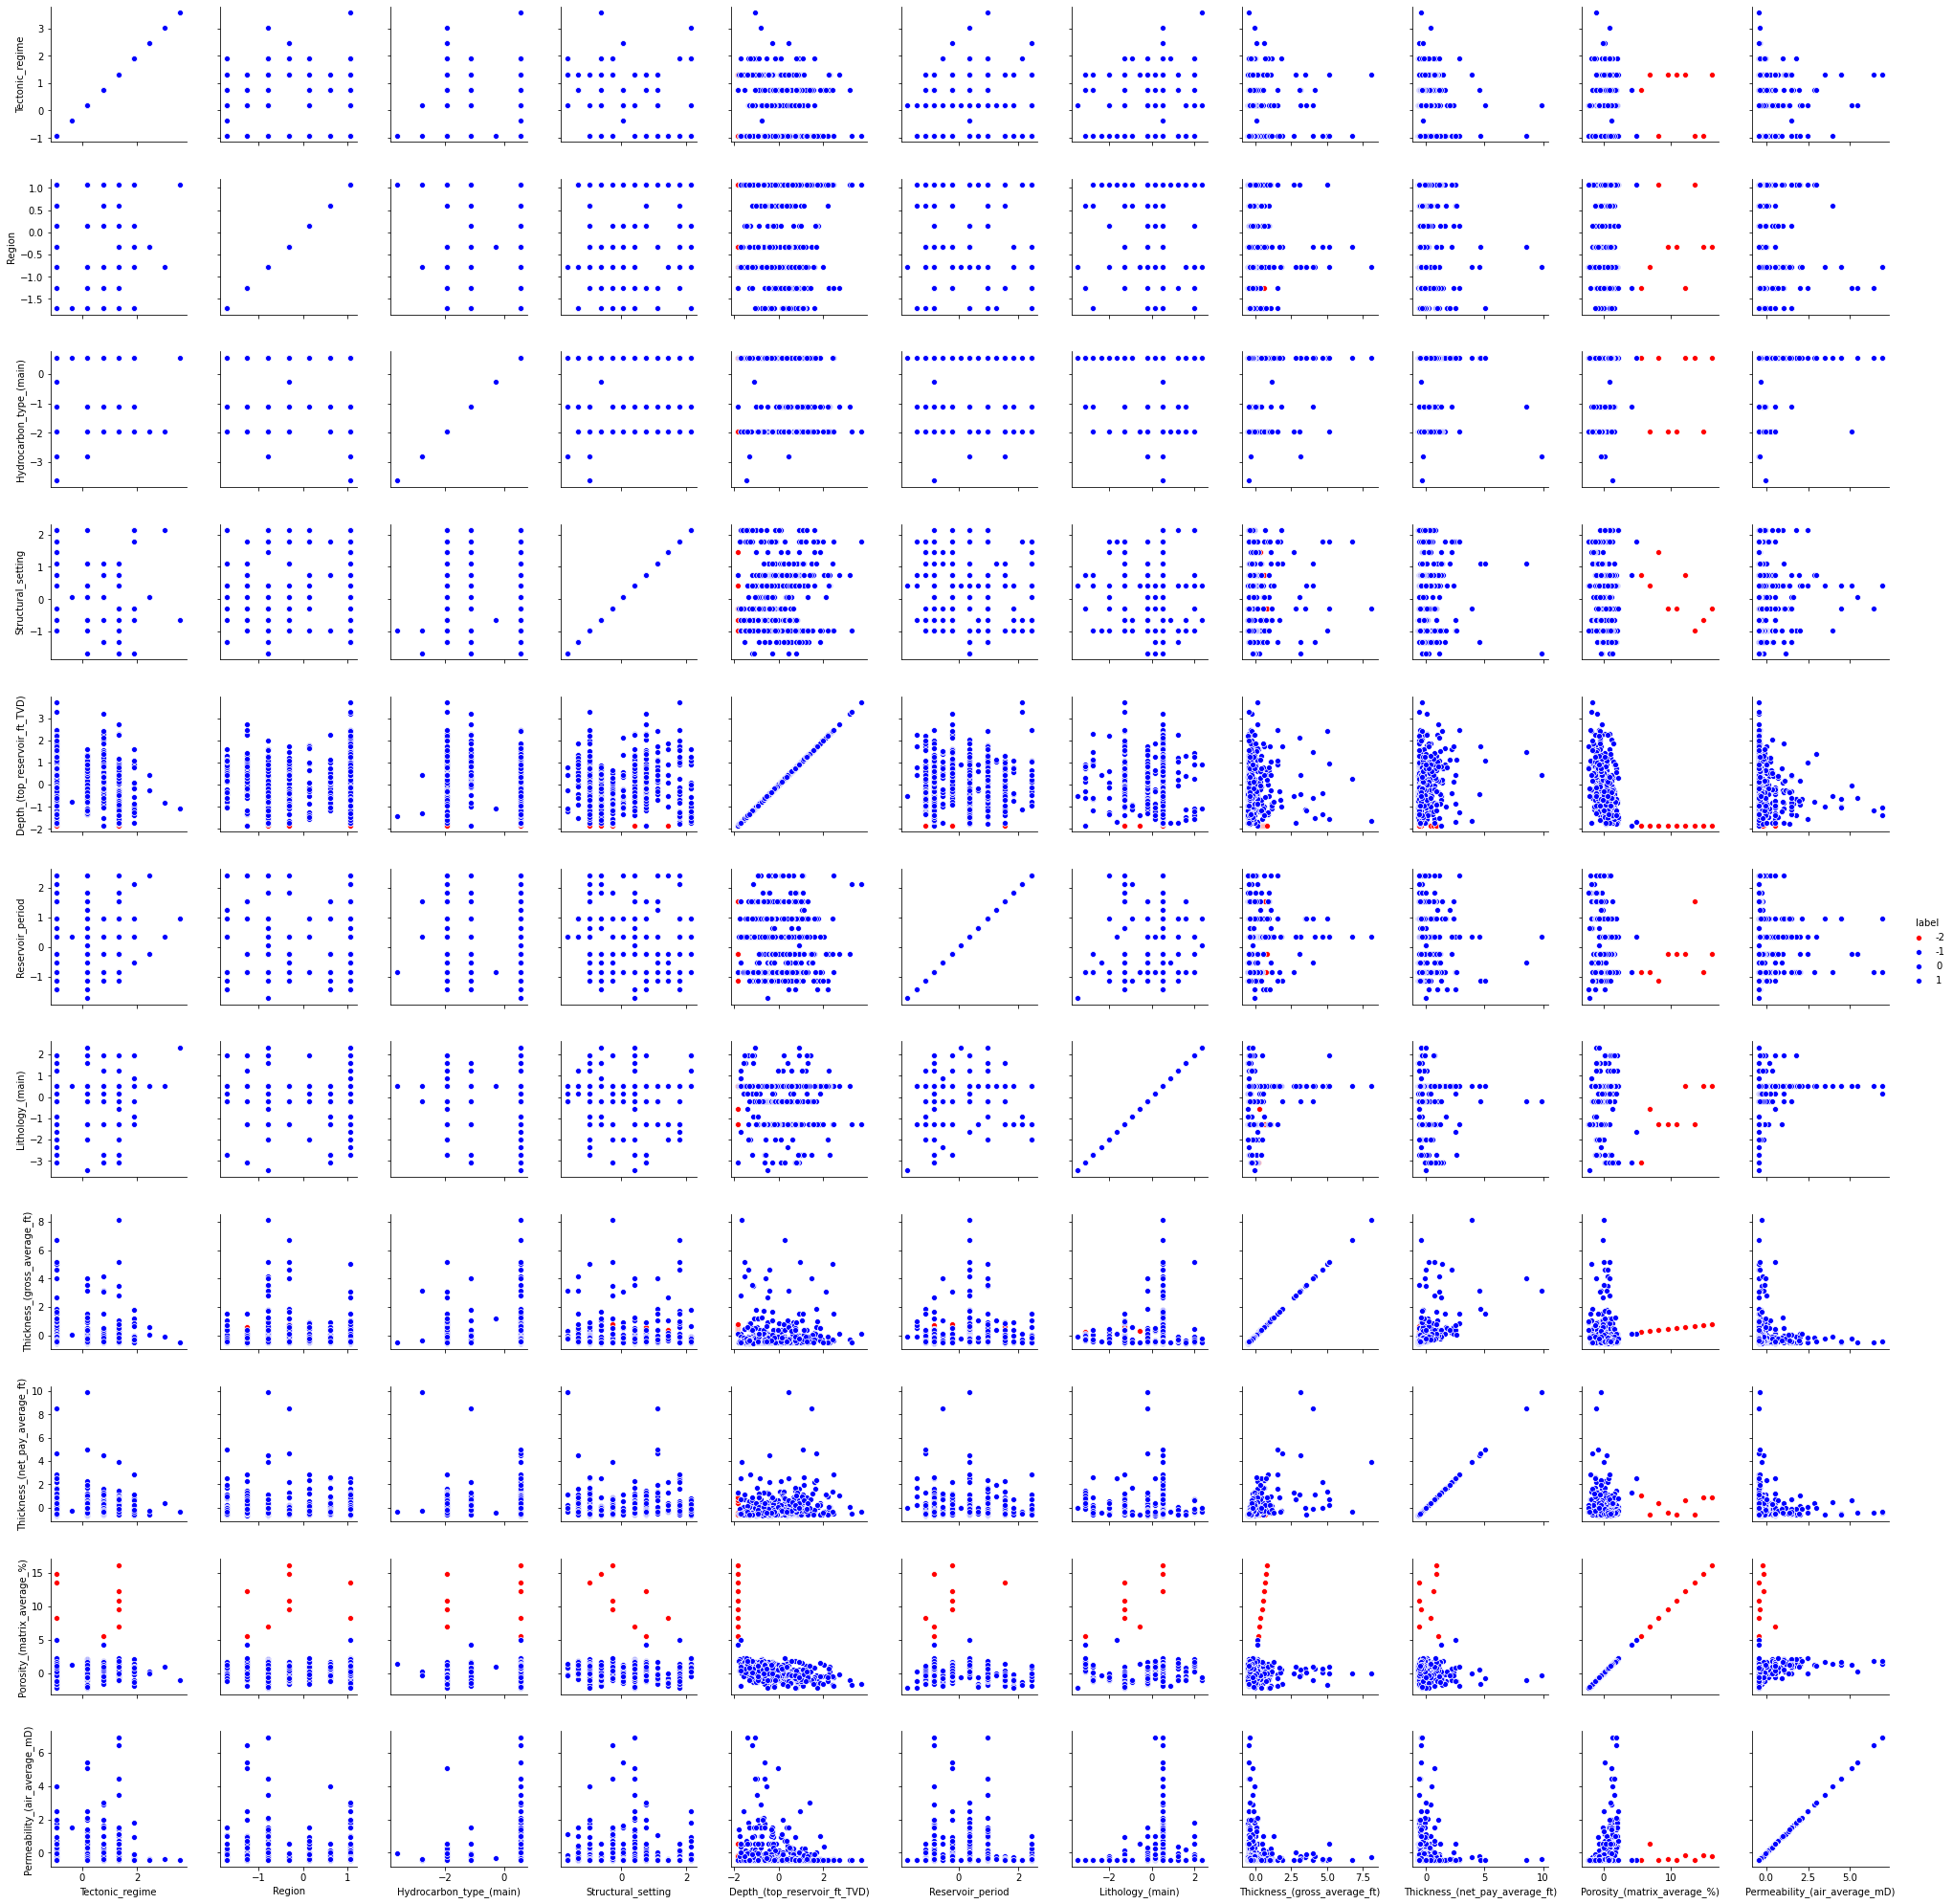

In [53]:
sns.pairplot(rand_data_to_show, vars = rand_data_to_show[need_cols], hue = 'label', palette={1: 'b', -1: 'b', 0: 'b', -2: 'r'}, diag_kind=None)